In [2]:
import matplotlib.pyplot as plt
import pandas as pd

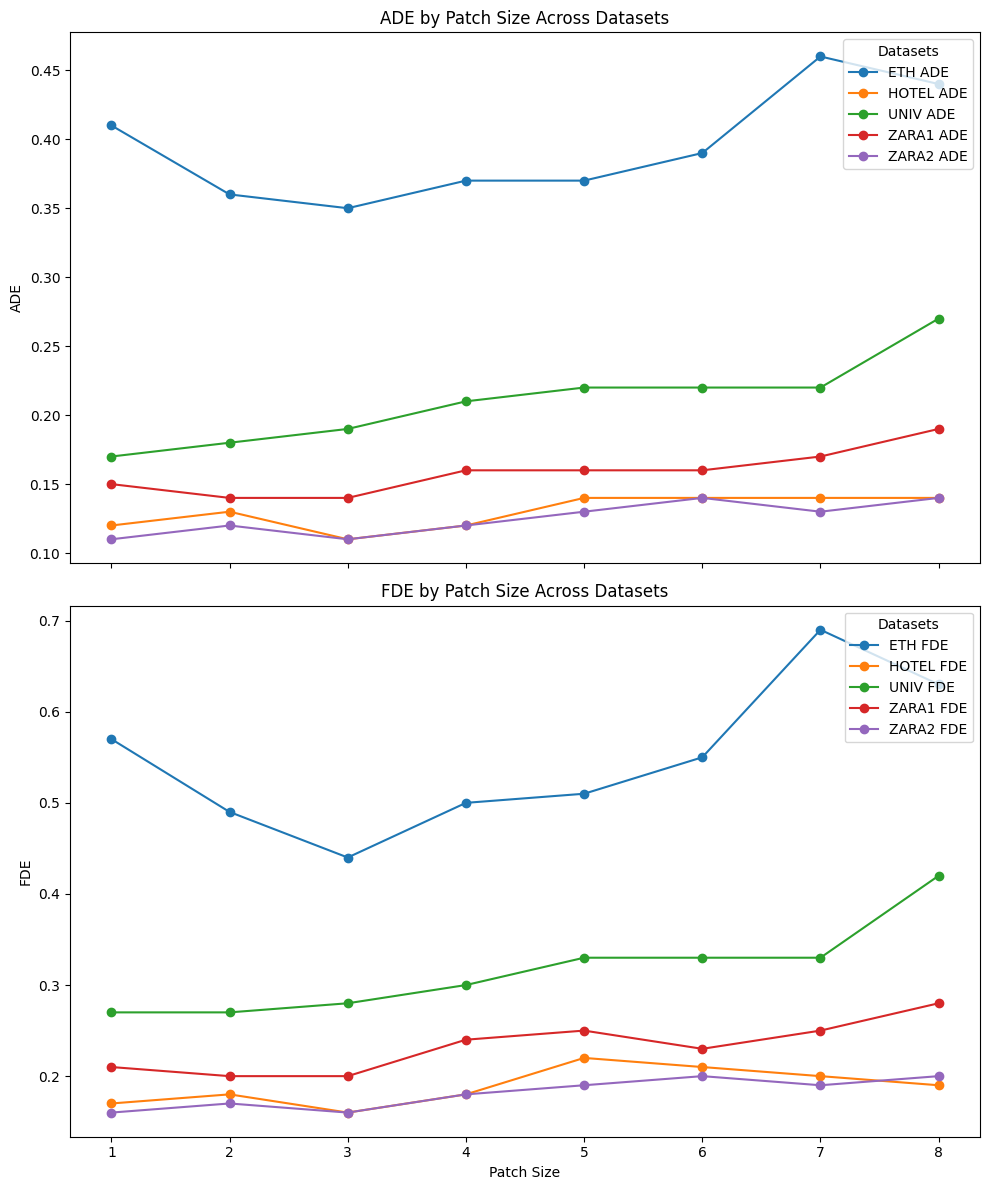

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data
data = {
    "patch_size": [1, 2, 3, 4, 5, 6, 7, 8],
    "ETH_ADE": [0.41, 0.36, 0.35, 0.37, 0.37, 0.39, 0.46, 0.44],
    "ETH_FDE": [0.57, 0.49, 0.44, 0.50, 0.51, 0.55, 0.69, 0.63],
    "HOTEL_ADE": [0.12, 0.13, 0.11, 0.12, 0.14, 0.14, 0.14, 0.14],
    "HOTEL_FDE": [0.17, 0.18, 0.16, 0.18, 0.22, 0.21, 0.20, 0.19],
    "UNIV_ADE": [0.17, 0.18, 0.19, 0.21, 0.22, 0.22, 0.22, 0.27],
    "UNIV_FDE": [0.27, 0.27, 0.28, 0.30, 0.33, 0.33, 0.33, 0.42],
    "ZARA1_ADE": [0.15, 0.14, 0.14, 0.16, 0.16, 0.16, 0.17, 0.19],
    "ZARA1_FDE": [0.21, 0.20, 0.20, 0.24, 0.25, 0.23, 0.25, 0.28],
    "ZARA2_ADE": [0.11, 0.12, 0.11, 0.12, 0.13, 0.14, 0.13, 0.14],
    "ZARA2_FDE": [0.16, 0.17, 0.16, 0.18, 0.19, 0.20, 0.19, 0.20]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

for dataset in ["ETH", "HOTEL", "UNIV", "ZARA1", "ZARA2"]:
    ax[0].plot(df["patch_size"], df[f"{dataset}_ADE"], marker='o', label=f"{dataset} ADE")
    ax[1].plot(df["patch_size"], df[f"{dataset}_FDE"], marker='o', label=f"{dataset} FDE")

ax[0].set_ylabel("ADE")
ax[1].set_ylabel("FDE")
ax[1].set_xlabel("Patch Size")
ax[0].legend(loc="upper right", title="Datasets")
ax[1].legend(loc="upper right", title="Datasets")
ax[0].set_title("ADE by Patch Size Across Datasets")
ax[1].set_title("FDE by Patch Size Across Datasets")

plt.tight_layout()
plt.show()


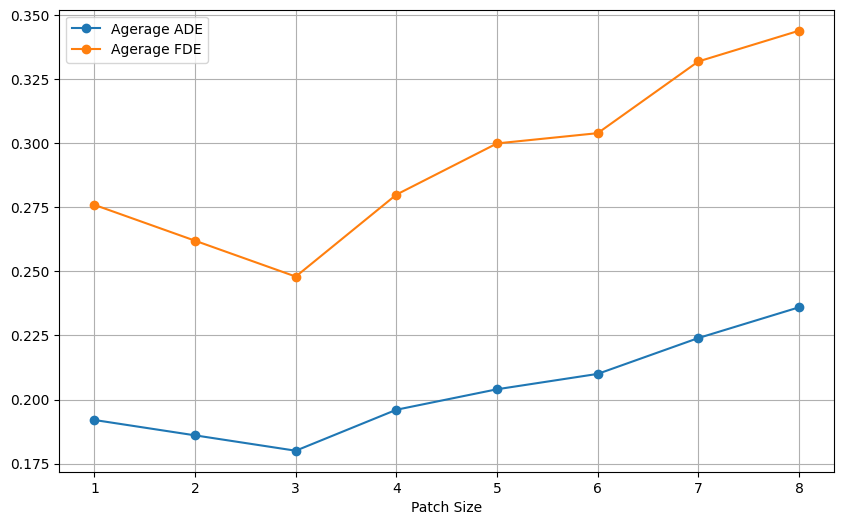

In [13]:
# Calculating the mean ADE and FDE across all datasets for each patch
df_means = df.mean(axis=1).to_frame()
df_means.columns = ['Mean']
df_means['Patch'] = df['patch_size']
df_means['Mean_ADE'] = df[['ETH_ADE', 'HOTEL_ADE', 'UNIV_ADE', 'ZARA1_ADE', 'ZARA2_ADE']].mean(axis=1)
df_means['Mean_FDE'] = df[['ETH_FDE', 'HOTEL_FDE', 'UNIV_FDE', 'ZARA1_FDE', 'ZARA2_FDE']].mean(axis=1)

# Plotting the means
plt.figure(figsize=(10, 6))
plt.plot(df_means['Patch'], df_means['Mean_ADE'], marker='o', label='Agerage ADE')
plt.plot(df_means['Patch'], df_means['Mean_FDE'], marker='o', label='Agerage FDE')
plt.xlabel("Patch Size")
plt.legend()
plt.grid(True)
plt.show()


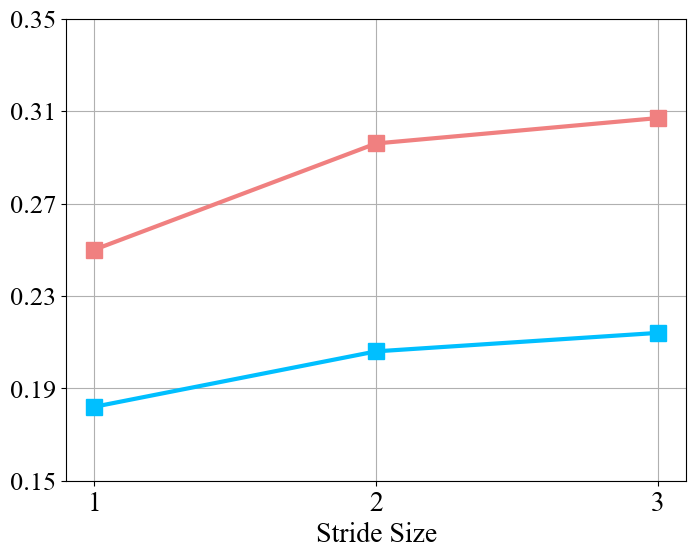

In [23]:
# Data for stride size analysis
plt.rcParams["font.family"] = "Times New Roman"
import numpy as np

stride_data = {
    "stride_size": [1, 2, 3],
    "ETH_ADE": [0.36, 0.41, 0.42],
    "ETH_FDE": [0.45, 0.56, 0.55],
    "HOTEL_ADE": [0.11, 0.14, 0.15],
    "HOTEL_FDE": [0.16, 0.21, 0.24],
    "UNIV_ADE": [0.19, 0.21, 0.22],
    "UNIV_FDE": [0.28, 0.31, 0.33],
    "ZARA1_ADE": [0.14, 0.15, 0.15],
    "ZARA1_FDE": [0.20, 0.22, 0.23],
    "ZARA2_ADE": [0.11, 0.12, 0.13],
    "ZARA2_FDE": [0.16, 0.18, 0.185]
}

# Convert to DataFrame
df_stride = pd.DataFrame(stride_data)

# Calculate means for stride sizes
df_stride_means = df_stride.mean(axis=1).to_frame()
df_stride_means.columns = ['Mean']
df_stride_means['Stride'] = df_stride['stride_size']
df_stride_means['Mean_ADE'] = df_stride[['ETH_ADE', 'HOTEL_ADE', 'UNIV_ADE', 'ZARA1_ADE', 'ZARA2_ADE']].mean(axis=1)
df_stride_means['Mean_FDE'] = df_stride[['ETH_FDE', 'HOTEL_FDE', 'UNIV_FDE', 'ZARA1_FDE', 'ZARA2_FDE']].mean(axis=1)

# Extract the maximum values from ADE and FDE to set the y-axis limits
max_ade = df_means['Mean_ADE'].max()
max_fde = df_means['Mean_FDE'].max()
max_y = max(max_ade, max_fde)  # Find the overall maximum to set a uniform scale for both

# Set minimum to zero for clarity in viewing the baseline
min_y = 0.15


# Plotting the means for stride sizes
# Replotting without grid and limited to stride sizes 1, 2, and 3
plt.figure(figsize=(8, 6))
plt.plot(df_stride_means['Stride'], df_stride_means['Mean_ADE'], marker='s', linewidth=3.0,label='Average ADE', markersize=12, color='deepskyblue')
plt.plot(df_stride_means['Stride'], df_stride_means['Mean_FDE'], marker='s', linewidth=3.0,label='Average FDE', markersize=12, color='lightcoral')
plt.xlabel("Stride Size", fontsize=20)
plt.xticks([1, 2, 3], fontsize=20)  # Set x-axis ticks specifically for stride sizes 1, 2, and 3
plt.yticks(np.arange(min_y, max_y + 0.01, 0.04), fontsize=19)  # Setting y-ticks to increase by 0.1

plt.grid(True)
# plt.legend()
plt.show()



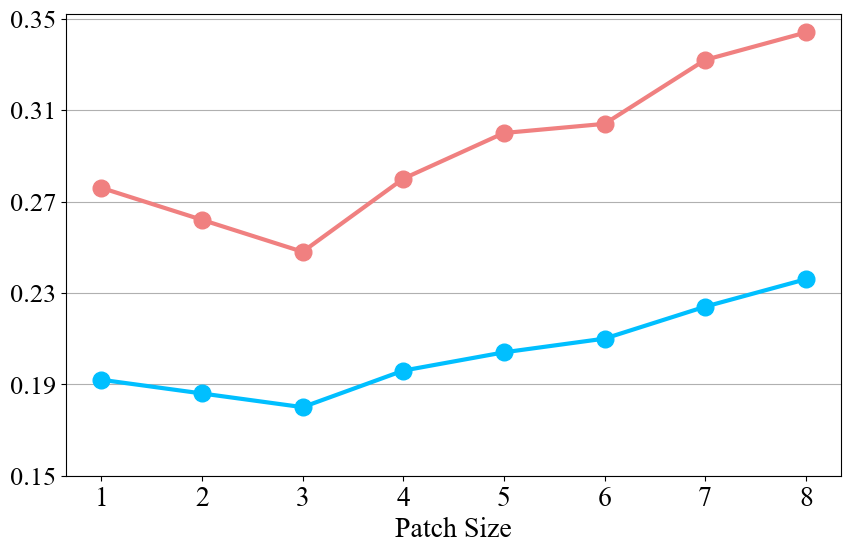

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Prepare the data
data = {
    "patch_size": [1, 2, 3, 4, 5, 6, 7, 8],
    "ETH_ADE": [0.41, 0.36, 0.35, 0.37, 0.37, 0.39, 0.46, 0.44],
    "ETH_FDE": [0.57, 0.49, 0.44, 0.50, 0.51, 0.55, 0.69, 0.63],
    "HOTEL_ADE": [0.12, 0.13, 0.11, 0.12, 0.14, 0.14, 0.14, 0.14],
    "HOTEL_FDE": [0.17, 0.18, 0.16, 0.18, 0.22, 0.21, 0.20, 0.19],
    "UNIV_ADE": [0.17, 0.18, 0.19, 0.21, 0.22, 0.22, 0.22, 0.27],
    "UNIV_FDE": [0.27, 0.27, 0.28, 0.30, 0.33, 0.33, 0.33, 0.42],
    "ZARA1_ADE": [0.15, 0.14, 0.14, 0.16, 0.16, 0.16, 0.17, 0.19],
    "ZARA1_FDE": [0.21, 0.20, 0.20, 0.24, 0.25, 0.23, 0.25, 0.28],
    "ZARA2_ADE": [0.11, 0.12, 0.11, 0.12, 0.13, 0.14, 0.13, 0.14],
    "ZARA2_FDE": [0.16, 0.17, 0.16, 0.18, 0.19, 0.20, 0.19, 0.20]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculating the mean ADE and FDE across all datasets for each patch
df_means = df.mean(axis=1).to_frame()
df_means.columns = ['Mean']
df_means['Patch'] = df['patch_size']
df_means['Mean_ADE'] = df[['ETH_ADE', 'HOTEL_ADE', 'UNIV_ADE', 'ZARA1_ADE', 'ZARA2_ADE']].mean(axis=1)
df_means['Mean_FDE'] = df[['ETH_FDE', 'HOTEL_FDE', 'UNIV_FDE', 'ZARA1_FDE', 'ZARA2_FDE']].mean(axis=1)

# Extract the maximum values from ADE and FDE to set the y-axis limits
max_ade = df_means['Mean_ADE'].max()
max_fde = df_means['Mean_FDE'].max()
max_y = max(max_ade, max_fde)  # Find the overall maximum to set a uniform scale for both

# Set minimum to zero for clarity in viewing the baseline
min_y = 0.15

# Plotting the means with y-axis interval of 0.1
plt.figure(figsize=(10, 6))
plt.plot(df_means['Patch'], df_means['Mean_ADE'], marker='o', linewidth=3.0,label='Average ADE', markersize=12, color='deepskyblue')
plt.plot(df_means['Patch'], df_means['Mean_FDE'], marker='o', linewidth=3.0,label='Average FDE', markersize=12, color='lightcoral')
plt.xlabel("Patch Size", fontsize=20)
plt.xticks(df_means['Patch'], fontsize=20)  # Set the fontsize to 14 or any other size you prefer

plt.yticks(np.arange(min_y, max_y + 0.01, 0.04), fontsize=19)  # Setting y-ticks to increase by 0.1
# plt.legend()
plt.gca().yaxis.grid(True)

plt.show()


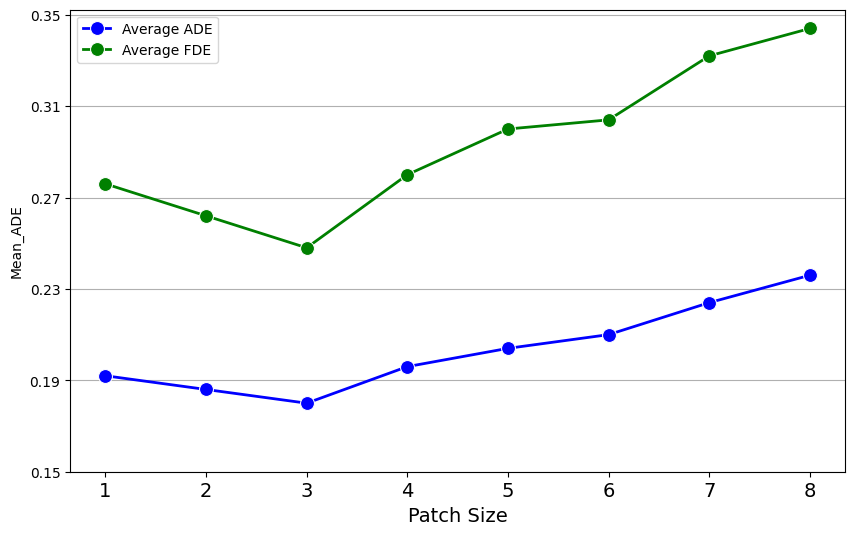

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
data = {
    "patch_size": [1, 2, 3, 4, 5, 6, 7, 8],
    "ETH_ADE": [0.41, 0.36, 0.35, 0.37, 0.37, 0.39, 0.46, 0.44],
    "ETH_FDE": [0.57, 0.49, 0.44, 0.50, 0.51, 0.55, 0.69, 0.63],
    "HOTEL_ADE": [0.12, 0.13, 0.11, 0.12, 0.14, 0.14, 0.14, 0.14],
    "HOTEL_FDE": [0.17, 0.18, 0.16, 0.18, 0.22, 0.21, 0.20, 0.19],
    "UNIV_ADE": [0.17, 0.18, 0.19, 0.21, 0.22, 0.22, 0.22, 0.27],
    "UNIV_FDE": [0.27, 0.27, 0.28, 0.30, 0.33, 0.33, 0.33, 0.42],
    "ZARA1_ADE": [0.15, 0.14, 0.14, 0.16, 0.16, 0.16, 0.17, 0.19],
    "ZARA1_FDE": [0.21, 0.20, 0.20, 0.24, 0.25, 0.23, 0.25, 0.28],
    "ZARA2_ADE": [0.11, 0.12, 0.11, 0.12, 0.13, 0.14, 0.13, 0.14],
    "ZARA2_FDE": [0.16, 0.17, 0.16, 0.18, 0.19, 0.20, 0.19, 0.20]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculating the mean ADE and FDE across all datasets for each patch
df_means = df.mean(axis=1).to_frame()
df_means.columns = ['Mean']
df_means['Patch'] = df['patch_size']
df_means['Mean_ADE'] = df[['ETH_ADE', 'HOTEL_ADE', 'UNIV_ADE', 'ZARA1_ADE', 'ZARA2_ADE']].mean(axis=1)
df_means['Mean_FDE'] = df[['ETH_FDE', 'HOTEL_FDE', 'UNIV_FDE', 'ZARA1_FDE', 'ZARA2_FDE']].mean(axis=1)

# Extract the maximum values from ADE and FDE to set the y-axis limits
max_ade = df_means['Mean_ADE'].max()
max_fde = df_means['Mean_FDE'].max()
max_y = max(max_ade, max_fde)  # Find the overall maximum to set a uniform scale for both

# Set minimum to zero for clarity in viewing the baseline
min_y = 0.15

# Plotting the means with y-axis interval of 0.1 using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_means, x='Patch', y='Mean_ADE', marker='o', markersize=10, linewidth=2.0, label='Average ADE', color='b')
sns.lineplot(data=df_means, x='Patch', y='Mean_FDE', marker='o', markersize=10, linewidth=2.0, label='Average FDE', color='g')

plt.xlabel("Patch Size", fontsize=14)
plt.xticks(df_means['Patch'], fontsize=14)  # Set the fontsize to 14 or any other size you prefer
plt.yticks(np.arange(min_y, max_y + 0.01, 0.04))  # Setting y-ticks to increase by 0.1
plt.legend()
plt.gca().yaxis.grid(True)

plt.show()